# Name = Pavankumar kamble

In [1]:
import pandas as pd
import numpy as np
import scipy as stats
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

In [2]:
df= pd.read_csv(r'D:\data science\data science assg\assg.5 multi linear reg\ToyotaCorolla.csv',encoding='windows-1252')

In [3]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
df.corr()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


<AxesSubplot:>

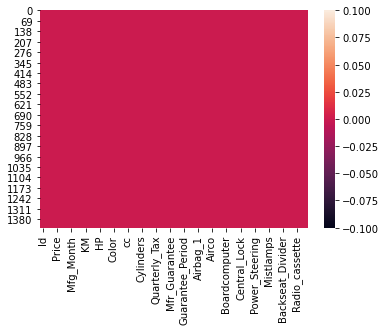

In [5]:
sns.heatmap(df.isnull())

In [6]:
Fuel = ['Fuel_Type']
df = pd.get_dummies(df,columns=Fuel,drop_first=True)


In [7]:
col = ['Color']
df = pd.get_dummies(df,columns=col,drop_first=True)

In [8]:
df = df.drop('Model',axis=1)


In [9]:
df = df.drop('Id',axis=1)

In [10]:
X = df.drop('Price',axis=1)
y = df['Price']

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Price             1436 non-null   int64
 1   Age_08_04         1436 non-null   int64
 2   Mfg_Month         1436 non-null   int64
 3   Mfg_Year          1436 non-null   int64
 4   KM                1436 non-null   int64
 5   HP                1436 non-null   int64
 6   Met_Color         1436 non-null   int64
 7   Automatic         1436 non-null   int64
 8   cc                1436 non-null   int64
 9   Doors             1436 non-null   int64
 10  Cylinders         1436 non-null   int64
 11  Gears             1436 non-null   int64
 12  Quarterly_Tax     1436 non-null   int64
 13  Weight            1436 non-null   int64
 14  Mfr_Guarantee     1436 non-null   int64
 15  BOVAG_Guarantee   1436 non-null   int64
 16  Guarantee_Period  1436 non-null   int64
 17  ABS               1436 non-null  

In [13]:
from sklearn.linear_model import LinearRegression
la=LinearRegression()

In [14]:
la.fit(x_train,y_train)

LinearRegression()

In [15]:
p =la.predict(x_test)
print(p)

[10663.71422849 11999.8790568  10879.2722465  17881.09673036
  9915.16997619 15491.14331707 15317.2136593  10460.93949734
 11407.40503584  9474.35404424 11129.22616836  9157.63313086
 16246.0624913  15285.82511424 11849.51493012 10874.55246552
  7252.9606845   6907.89829003  7158.42266326 11586.86799528
 10417.87347778  9146.74580823 13719.34269961  8201.17446304
  6712.10357775 10870.95688532  8990.08197846  7857.55375135
  9000.8120267  15133.30827824  7794.84321738  9875.54515469
  9048.0630989   9815.44972562  7902.55221215  7430.23170409
  9384.50471958  8490.94241522  7855.74159622  5809.16434196
  8525.48570453  9357.71489168  8662.0498626   5686.75734665
  8438.59967688 16221.579652   10005.45025188 12563.44389458
 12481.79329292  8340.88332811  8473.63332867 21810.51016444
 10982.69889161  8260.29542317 14967.6319389  13357.69904926
  9796.26237748  8893.19597422  8106.45005502  7976.89767588
 10608.98887366  8791.33418955 11718.1394159  11362.47395864
 11955.06777427  8003.03

In [16]:
acc = la.score(x_test,y_test)
acc

0.9104691881038712

In [17]:
from sklearn import metrics

In [18]:
np.sqrt(metrics.mean_squared_error(y_test,p))

1159.170262497052

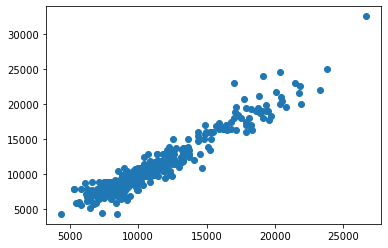

In [19]:
plt.scatter(p,y_test)